# Language variables
Model including speech, BERT entropy, BERT surprisal and frequency

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from tools.create import create_set_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from tools.viz import plot_contrast_by_analysis

In [3]:
api = Neuroscout()

## Create and compile

In [4]:
predictors = ["speech", "BERTLM_pre_25_surprisal", "BERTLM_pre_25_entropy", "subtlexusfrequency_Lg10WF", "text_length"]

In [8]:
transformations = [{"Name": "Scale", 
                    "Demean": True, 
                    "Rescale": True,
                    "ReplaceNA": "after", 
                    "Input": ["BERTLM_pre_25_surprisal", 
                              "BERTLM_pre_25_entropy", 
                              "subtlexusfrequency_Lg10WF"]}]

In [9]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 
             'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

In [12]:
mdict = create_set_models(predictors, confounds, name='+'.join(predictors), transformations=transformations)

Dataset: SchematicNarrative, Predictors: ['speech', 'BERTLM_pre_25_surprisal', 'BERTLM_pre_25_entropy', 'subtlexusfrequency_Lg10WF', 'text_length'] Not all named predictors could be found for the specified runs.
Dataset: studyforrest, Predictors: ['speech', 'BERTLM_pre_25_surprisal', 'BERTLM_pre_25_entropy', 'subtlexusfrequency_Lg10WF', 'text_length'] Not all named predictors could be found for the specified runs.


In [15]:
set_models = {}
set_models['+'.join(predictors)] = mdict

In [5]:
filename = Path('models') / 'language_variables.json'

In [18]:
dump_collection(set_models, filename)

In [6]:
set_models = load_collection(filename)

### Reports

In [20]:
""" Run reports for all models """
for (pred, dataset, task), model in flatten_collection(set_models):
    model.generate_report(run_id=model.runs[0])

In [30]:
# Plot example design matrix
set_models['+'.join(predictors)]['LearningTemporalStructure']['movie'].plot_report()

'OK'

### Compile

In [35]:
for (pred, dataset, task), model in flatten_collection(set_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.push()
        model.compile()
    else:
        print(f'{model.status}')
        print(f'{dataset}')

PASSED
HealthyBrainNetwork
PASSED
LearningTemporalStructure
PASSED
Life
PASSED
ParanoiaStory
PASSED
Raiders
PASSED
Sherlock
PASSED
SherlockMerlin
PASSED
SherlockMerlin


In [36]:
print(' '.join([model.hash_id for (pred, dataset, task), model in flatten_collection(set_models)]))

MD1l4 AdRlB w0gzN wK2Q5 wQDdz Aopra Arq88 MzQEj


## Results

In [7]:
flat_models = flatten_collection(set_models)

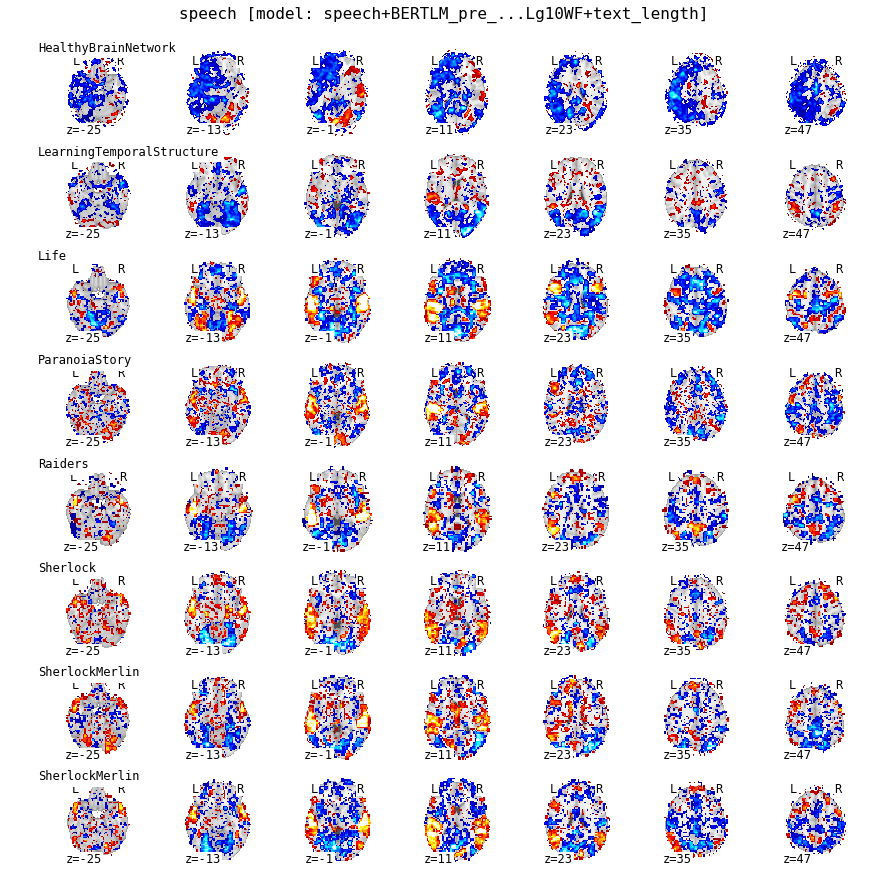

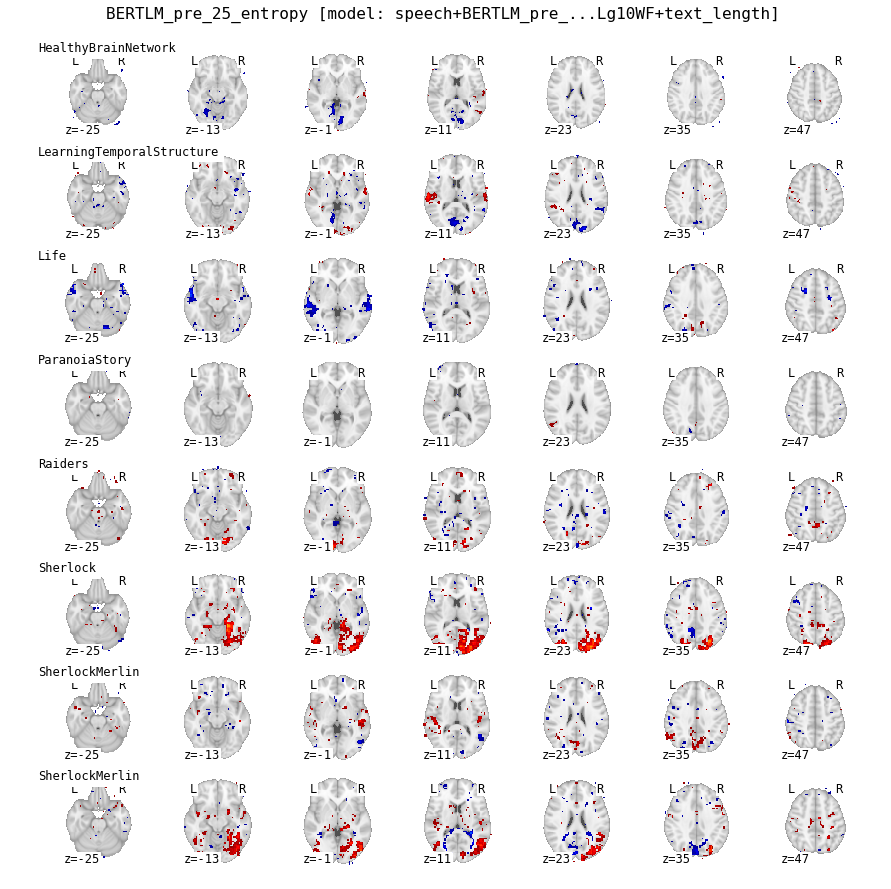

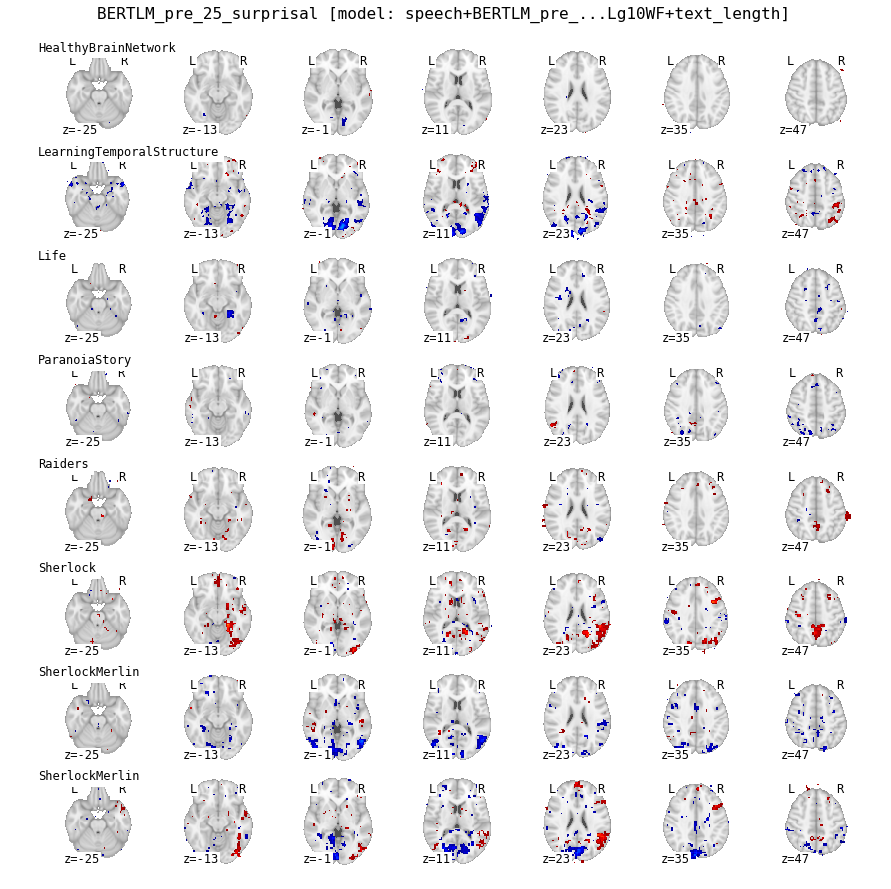

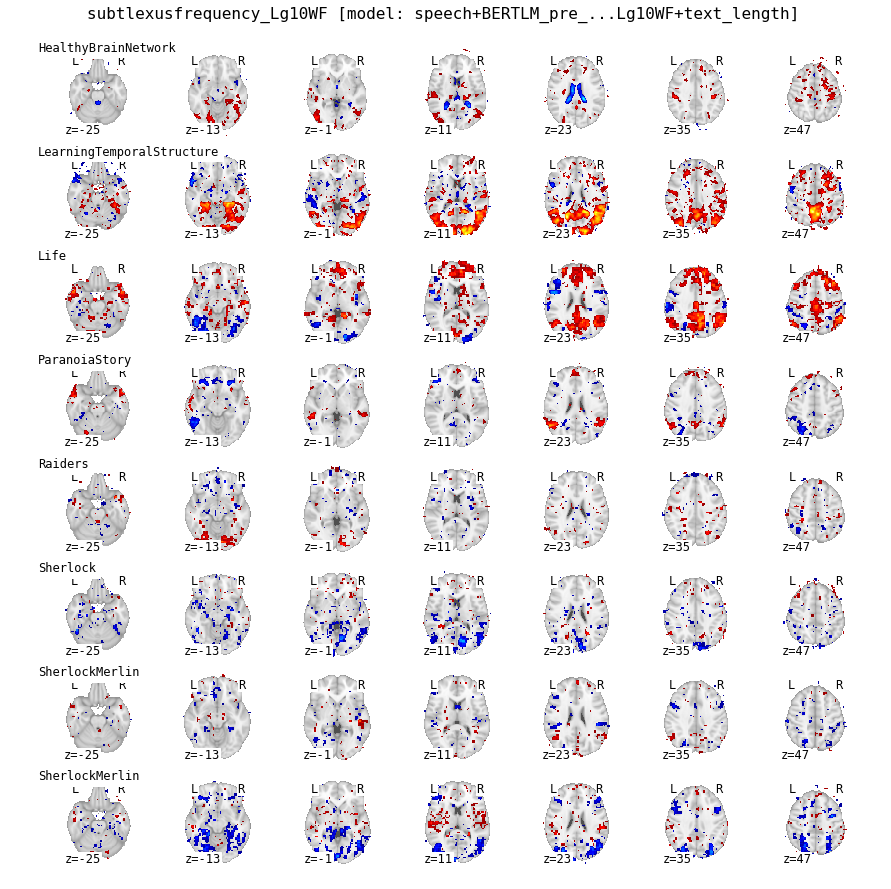

/home/roberta/anaconda3/lib/python3.7/site-packages/nilearn/plotting/displays.py:780: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
/home/roberta/anaconda3/lib/python3.7/site-packages/nilearn/plotting/displays.py:780: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


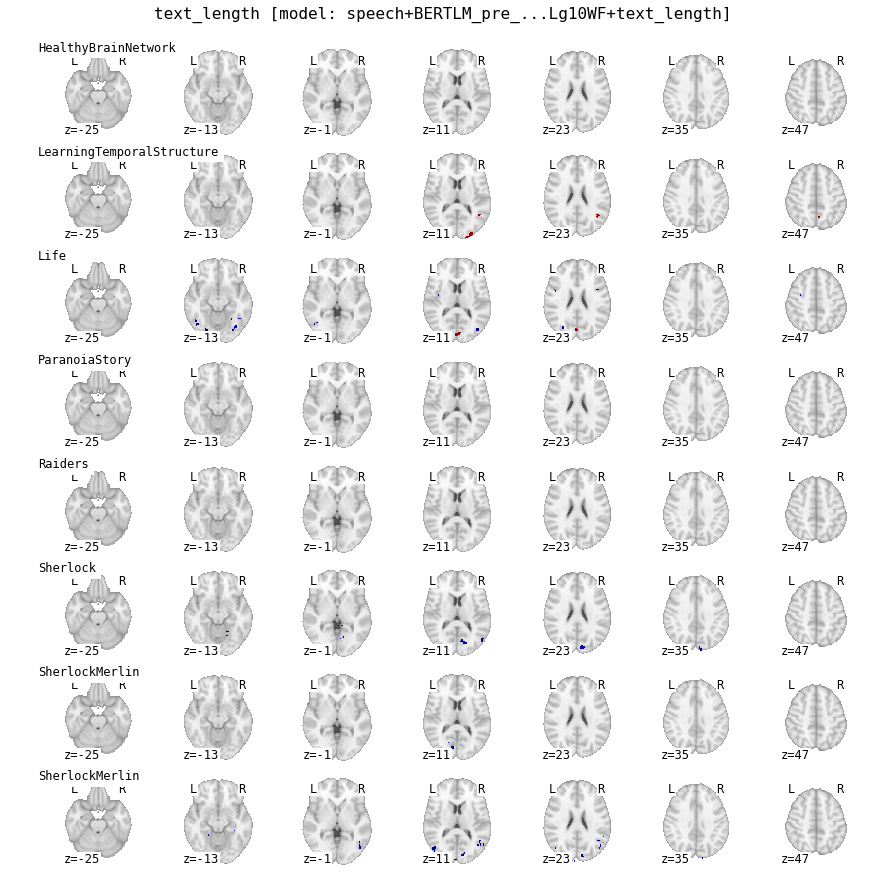

In [8]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(analyses=flat_models,
                          vmax=10, display_mode='z', 
                          figsize=(15,15),
                          threshold=1.96, colorbar=False)